## Chapter 03. 可视化数据
### 3.1 matplotlib
简单线图

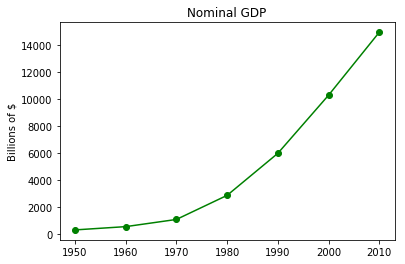

In [1]:
from matplotlib import pyplot as plt

def make_chart_simple_line_chart():
    years = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
    gdp = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3]
    # create a line chart, years on x-axis, gdp on y-axis
    plt.plot(years, gdp, color='green', marker='o', linestyle='solid')
    # add a title
    plt.title("Nominal GDP")
    # add a label to the y-axis
    plt.ylabel("Billions of $")
    plt.show()

make_chart_simple_line_chart()

### 3.2 条形图
如果你想展示某些离散的项目集合中的数量是如何变化的，可以使用条形图。下图显示了几部电影所获得的奥斯卡金像奖的数目：

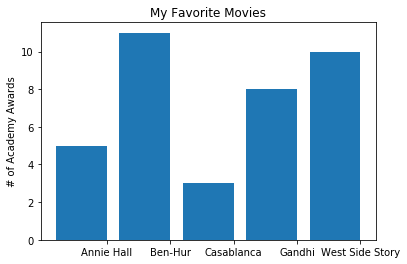

In [2]:
from matplotlib import pyplot as plt

def make_chart_simple_bar_chart():
    movies = ["Annie Hall", "Ben-Hur", "Casablanca", "Gandhi", "West Side Story"]
    num_oscars = [5, 11, 3, 8, 10]
    # bars are by default width 0.8, so we'll add 0.1 to the left coordinates
    # so that each bar is centered
    xs = [i + 0.1 for i, _ in enumerate(movies)]
    # plot bars with left x-coordinates [xs], heights [num_oscars]
    plt.bar(xs, num_oscars)
    plt.ylabel("# of Academy Awards")
    plt.title("My Favorite Movies")
    # label x-axis with movie names at bar centers
    plt.xticks([i + 0.5 for i, _ in enumerate(movies)], movies)
    plt.show()
    
make_chart_simple_bar_chart()

条形图也可以用来绘制拥有大量数值取值的变量直方图，以此来探索这些取值是如何分布的:

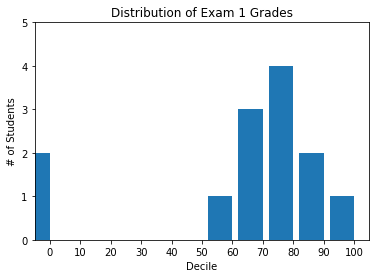

In [3]:
from matplotlib import pyplot as plt
from collections import Counter

def make_chart_histogram():
    grades = [83,95,91,87,70,0,85,82,100,67,73,77,0]
    decile = lambda grade: grade // 10 * 10
    histogram = Counter(decile(grade) for grade in grades)

    plt.bar([x - 4 for x in histogram.keys()], # shift each bar to the left by 4
            histogram.values(),                # give each bar its correct height
            8)                                 # give each bar a width of 8
    plt.axis([-5, 105, 0, 5])                  # x-axis from -5 to 105,
                                               # y-axis from 0 to 5
    plt.xticks([10 * i for i in range(11)])    # x-axis labels at 0, 10, ..., 100
    plt.xlabel("Decile")
    plt.ylabel("# of Students")
    plt.title("Distribution of Exam 1 Grades")
    plt.show()

make_chart_histogram()

在使用plt.axis()时要谨慎。在创建条形图时，y轴不从0开始是一种特别不好的形式，因为这很容易误导人:

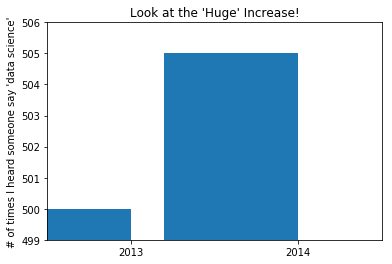

In [4]:
from matplotlib import pyplot as plt

def make_chart_misleading_y_axis(mislead=True):
    mentions = [500, 505]
    years = [2013, 2014]

    plt.bar([2012.6, 2013.6], mentions, 0.8)
    plt.xticks(years)
    plt.ylabel("# of times I heard someone say 'data science'")

    # if you don't do this, matplotlib will label the x-axis 0, 1
    # and then add a +2.013e3 off in the corner (bad matplotlib!)
    plt.ticklabel_format(useOffset=False)

    if mislead:
        # misleading y-axis only shows the part above 500
        plt.axis([2012.5,2014.5,499,506])
        plt.title("Look at the 'Huge' Increase!")
    else:
        plt.axis([2012.5,2014.5,0,550])
        plt.title("Not So Huge Anymore.")
    plt.show()
    
make_chart_misleading_y_axis(True)

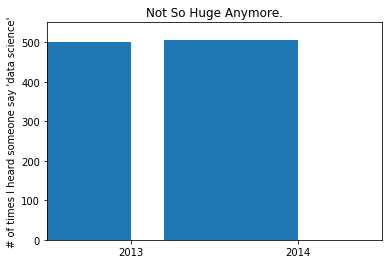

In [5]:
make_chart_misleading_y_axis(False)

### 3.3 线图
线图可以用来清晰地显示某种事物的趋势:

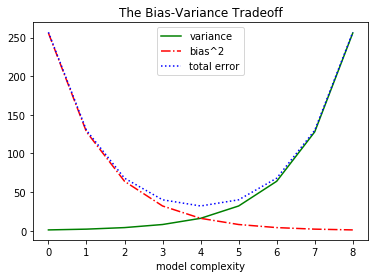

In [7]:
from matplotlib import pyplot as plt

def make_chart_several_line_charts():
    variance     = [1,2,4,8,16,32,64,128,256]
    bias_squared = [256,128,64,32,16,8,4,2,1]
    total_error  = [x + y for x, y in zip(variance, bias_squared)]

    xs = range(len(variance))

    # we can make multiple calls to plt.plot
    # to show multiple series on the same chart
    plt.plot(xs, variance,     'g-',  label='variance')    # green solid line
    plt.plot(xs, bias_squared, 'r-.', label='bias^2')      # red dot-dashed line
    plt.plot(xs, total_error,  'b:',  label='total error') # blue dotted line

    # because we've assigned labels to each series
    # we can get a legend for free
    # loc=9 means "top center"
    plt.legend(loc=9)
    plt.xlabel("model complexity")
    plt.title("The Bias-Variance Tradeoff")
    plt.show()

make_chart_several_line_charts()

### 3.4 散点图
散点图是显示成对数据集的可视化关系的好选择。比如，下图显示了你的用户们已有的朋友数和他们每天花在网站上的分钟数之间的关系：

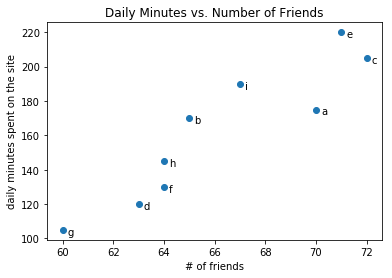

In [8]:
from matplotlib import pyplot as plt

def make_chart_scatter_plot():
    friends = [ 70, 65, 72, 63, 71, 64, 60, 64, 67]
    minutes = [175, 170, 205, 120, 220, 130, 105, 145, 190]
    labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']

    plt.scatter(friends, minutes)

    # label each point
    for label, friend_count, minute_count in zip(labels, friends, minutes):
        plt.annotate(label,
                     xy=(friend_count, minute_count), # put the label with its point
                     xytext=(5, -5), # but slightly offset
                     textcoords='offset points')

    plt.title("Daily Minutes vs. Number of Friends")
    plt.xlabel("# of friends")
    plt.ylabel("daily minutes spent on the site")
    plt.show()
    
make_chart_scatter_plot()

当你分散了可比较的变量，如果让matplotlib选择刻度，可能会得到一个误导性的图:

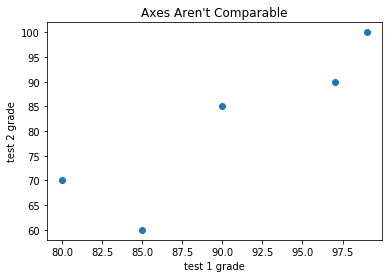

In [9]:
from matplotlib import pyplot as plt

def make_chart_scatterplot_axes(equal_axes=False):
    test_1_grades = [ 99, 90, 85, 97, 80]
    test_2_grades = [100, 85, 60, 90, 70]

    plt.scatter(test_1_grades, test_2_grades)
    plt.xlabel("test 1 grade")
    plt.ylabel("test 2 grade")

    if equal_axes:
        plt.title("Axes Are Comparable")
        plt.axis("equal")
    else:
        plt.title("Axes Aren't Comparable")
    plt.show()

make_chart_scatterplot_axes()

如果我们引入对plt.axis("equal")的调用，图形会更精确地显示大多数变化是发生在测验2上：

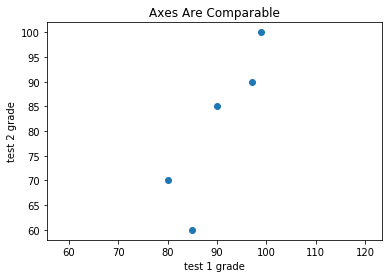

In [10]:
make_chart_scatterplot_axes(True)